In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)




In [2]:
df=pd.read_csv('houseprice.csv')

In [3]:
data_num = df.select_dtypes(include=np.number)
data_not_num = df.select_dtypes(exclude=np.number)


In [4]:
df.isnull().mean()[df.isnull().mean()>0].sort_values(ascending=False)*100

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [5]:
missing_percent = df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=False)*100
missing_percent = missing_percent[missing_percent > 45].index.tolist()
df.drop(missing_percent, axis=1, inplace=True)



In [6]:
data_num_isnull=data_num.isnull().mean()[data_num.isnull().mean()>0].index.tolist()
print(data_num_isnull)


['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [7]:
# Assuming the DataFrame is stored in a variable named 'df[data_num_isnull]'
Q1 = df[data_num_isnull].quantile(0.25)
Q3 = df[data_num_isnull].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[data_num_isnull]= df[data_num_isnull].mask(df[data_num_isnull]< lower_bound, lower_bound, axis=1)
df[data_num_isnull]= df[data_num_isnull].mask(df[data_num_isnull]> upper_bound, upper_bound, axis=1)






In [8]:
df[data_num.columns] = df[data_num.columns].fillna(df[data_num.columns].mean())
df=df.fillna(df.mode().iloc[0])


In [9]:

for col in df[df.select_dtypes(exclude=np.number).columns]:
    print(col,':',df[col].unique())

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street : ['Pave' 'Grvl']
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities : ['AllPub' 'NoSeWa']
LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope : ['Gtl' 'Mod' 'Sev']
Neighborhood : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl : ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st : ['VinylSd' 'Meta

In [10]:
df=df.drop(['GarageCond','Id'],axis=1)

In [11]:
# one_code_encode_list=[]
# for col in df[df.select_dtypes(exclude=np.number).columns]:
#     if len(df[col].unique())<=5:
#         one_code_encode_list.append(col)
#         print(col,':',df[col].unique())

In [12]:
# label_ecode_list=[]
# for col in df[df.select_dtypes(exclude=np.number).columns]:
#     if len(df[col].unique())>5:
#         label_ecode_list.append(col)
#         print(col,':',df[col].unique())

In [13]:
# import category_encoders as ce
# def one_hot_encoding(df, cols, drop_first=True):
#     df = df.copy()
#     df = pd.get_dummies(df, columns=cols, drop_first=drop_first)
#     return df

# df=one_hot_encoding(df,one_code_encode_list)



In [14]:
# def label_encoding(df, cols):
#     df = df.copy()
#     for col in cols:
#         df[col] = df[col].astype('category').cat.codes
#     return df
# df=label_encoding(df,label_ecode_list)

In [15]:
def label_encoding(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return df
df=label_encoding(df,df.select_dtypes(exclude=np.number).columns)

In [16]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.134888,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,12.251370,2.031507,2.008219,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,1.762329,90.192149,2.539726,3.733562,1.396575,2.280137,2.817123,2.284247,2.789726,443.639726,4.715753,46.549315,567.240411,1057.429452,1.036301,1.538356,0.934932,3.682192,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,2.339726,6.517808,5.749315,0.613014,2.208219,1978.506164,1.228767,1.767123,472.980137,3.871918,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,17.831635,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,6.013735,0.868515,0.259040,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,0.614274,134.554833,0.693995,0.731807,0.722394,0.864510,0.650919,1.138472,1.837550,456.098091,0.925252,161.319273,441.866955,438.705324,0.295124,1.739524,0.246731,1.051301,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.830161,1.625393,0.979659,0.644666,1.759864,23.994583,0.811835,0.747315,213.804841,0.594151,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,27.500000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,7.000000,2.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000

In [17]:
import pandas as pd

# Load the DataFrame into a variable named 'df'

# Create a correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop the correlated features
df = df.drop(to_drop, axis=1)


In [18]:
from scipy import stats
threshold=3.15
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < threshold).all(axis=1)]

df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.000000,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,854,0,1710,1,0,2,1,3,1,2,6,0,1,2003.0,1,2,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
2,60,3,68.000000,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,866,0,1786,1,0,2,1,3,1,2,6,1,1,2001.0,1,2,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
4,60,3,84.000000,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1053,0,2198,1,0,2,1,4,1,2,6,1,1,2000.0,1,3,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
6,20,3,75.000000,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,0,0,1694,1,0,2,0,3,1,2,6,1,1,2004.0,1,2,4,2,255,57,0,0,0,0,0,8,2007,8,4,307000
10,20,3,70.000000,11200,1,3,3,0,4,0,19,2,2,0,2,5,5,1965,1965,3,1,6,2,0.0,3,4,1,3,3,3,4,906,5,0,134,1040,1,0,1,4,0,0,1040,1,0,1,0,3,1,3,6,0,5,1965.0,2,1,4,2,0,0,0,0,0,0,0,2,2008,8,4,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,20,3,69.134888,26142,1,0,3,0,1,0,11,2,2,0,2,5,7,1962,1962,1,1,6,1,189.0,3,4,1,3,3,3,4,593,5,0,595,1188,1,4,1,4,0,0,1188,0,0,1,0,3,1,3,6,0,1,1962.0,2,1,4,1,261,39,0,0,0,0,0,4,2010,8,4,157900
1447,60,3,80.000000,10000,1,3,3,0,4,0,5,2,2,0,5,8,5,1995,1996,1,1,12,1,415.0,2,4,2,2,3,3,2,1079,5,0,141,1220,1,0,1,4,870,0,2090,1,0,2,1,3,1,2,6,1,1,1995.0,1,2,4,2,0,65,0,0,0,0,0,12,2007,8,4,240000
1451,20,3,78.000000,9262,1,3,3,0,4,0,21,2,2,0,2,8,5,2008,2009,1,1,5,3,194.0,2,4,2,2,3,3,5,0,5,0,1573,1573,1,0,1,4,0,0,1578,0,0,2,0,3,1,0,6,1,1,2008.0,0,3,4,2,0,36,0,0,0,0,0,5,2009,6,5,287090
1452,180,4,35.000000,3675,1,3,3,0,4,0,7,2,2,4,7,5,5,2005,2005,1,1,12,1,80.0,3,4,2,2,3,1,2,547,5,0,0,547,1,2,1,4,0,0,1072,1,0,1,0,2,1,3,6,0,2,2005.0,0,2,4,2,0,28,0,0,0,0,0,5,2006,8,4,145000


In [19]:
from sklearn.preprocessing import FunctionTransformer
transformer=FunctionTransformer(np.log1p)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_no_y = df.drop(['SalePrice'], axis=1)
df[df_no_y.columns]= scaler.fit_transform(df[df_no_y.columns])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.132823,-0.335394,-0.268136,-0.250159,0.0,0.827203,0.1945,0.0,0.620813,0.0,-1.075994,0.126333,0.0,-0.404808,0.945770,0.577047,-0.562348,0.841087,0.729808,-0.484205,0.0,0.732087,-1.111448,0.747049,-1.049425,0.302276,0.757362,-0.238722,0.204947,0.679133,-0.343633,0.605078,0.22526,-0.211185,-1.001580,-0.628348,0.0,-0.753619,0.0,0.055771,1.229970,-0.039406,0.559306,1.099502,0.0,0.750915,1.224745,0.273861,0.0,-0.426574,0.123695,-1.048129,-0.549463,0.853182,-0.031282,0.175409,0.0,0.125491,-0.909504,0.332250,-0.269626,0.0,-0.226595,0.0,-0.139299,-1.624701,0.102332,0.325564,-0.251879,208500
2,0.132823,-0.335394,-0.101741,0.520293,0.0,-1.235474,0.1945,0.0,0.620813,0.0,-1.075994,0.126333,0.0,-0.404808,0.945770,0.577047,-0.562348,0.757432,0.674292,-0.484205,0.0,0.732087,-1.111448,0.484085,-1.049425,0.302276,0.757362,-0.238722,0.204947,-0.133559,-0.343633,0.069651,0.22526,-0.211185,-0.371538,-0.443426,0.0,-0.753619,0.0,0.055771,1.257905,-0.039406,0.731602,1.099502,0.0,0.750915,1.224745,0.273861,0.0,-0.426574,0.123695,0.629398,-0.549463,0.753452,-0.031282,0.175409,0.0,0.125491,-0.909504,-0.028495,-0.269626,0.0,-0.226595,0.0,-0.139299,1.031174,0.102332,0.325564,-0.251879,223500
4,0.132823,-0.335394,0.785704,1.348528,0.0,-1.235474,0.1945,0.0,-0.601857,0.0,0.573676,0.126333,0.0,-0.404808,0.945770,1.384411,-0.562348,0.715605,0.563258,-0.484205,0.0,0.732087,-1.111448,1.938121,-1.049425,0.302276,0.757362,-0.238722,0.204947,-1.758943,-0.343633,0.480956,0.22526,-0.211185,-0.247305,0.206688,0.0,-0.753619,0.0,0.055771,1.693223,-0.039406,1.665630,1.099502,0.0,0.750915,1.224745,1.745866,0.0,-0.426574,0.123695,0.629398,-0.549463,0.703587,-0.031282,1.625906,0.0,0.125491,0.874441,0.768940,-0.269626,0.0,-0.226595,0.0,-0.139299,2.169406,0.102332,0.325564,-0.251879,250000
6,-0.851898,-0.335394,0.286516,0.199454,0.0,0.827203,0.1945,0.0,0.620813,0.0,1.563478,0.126333,0.0,-0.404808,-0.692605,1.384411,-0.562348,0.882915,0.840842,-0.484205,0.0,0.732087,1.978569,0.669706,-1.049425,0.302276,0.757362,-2.762918,0.204947,-1.758943,-0.343633,2.218660,0.22526,-0.211185,-0.631098,1.769853,0.0,-0.753619,0.0,0.055771,-0.758059,-0.039406,0.523033,1.099502,0.0,0.750915,-0.816497,0.273861,0.0,-0.426574,0.123695,0.629398,-0.549463,0.903047,-0.031282,0.175409,0.0,0.125491,1.459798,0.256304,-0.269626,0.0,-0.226595,0.0,-0.139299,0.651763,-0.639290,0.325564,-0.251879,307000
10,-0.851898,-0.335394,0.009190,0.506534,0.0,0.827203,0.1945,0.0,0.620813,0.0,1.233544,0.126333,0.0,-0.404808,-0.692605,-1.037683,-0.562348,-0.748354,-1.379828,2.075732,0.0,-1.304704,0.433561,-0.768862,0.929754,0.302276,-1.012560,1.023376,0.204947,0.679133,0.753612,1.091830,0.22526,-0.211185,-1.037076,-0.096699,0.0,-0.753619,0.0,0.055771,-0.758059,-0.039406,-0.959623,1.099502,0.0,-1.234086,-0.816497,0.273861,0.0,0.928797,0.123695,-1.048129,2.125283,-1.041683,1.229759,-1.275088,0.0,0.125491,-0.909504,-0.825929,-0.269626,0.0,-0.226595,0.0,-0.139299,-1.624701,0.102332,0.325564,-0.251879,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [21]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.132823,-0.335394,-0.268136,-0.250159,0.0,0.827203,0.1945,0.0,0.620813,0.0,-1.075994,0.126333,0.0,-0.404808,0.945770,0.577047,-0.562348,0.841087,0.729808,-0.484205,0.0,0.732087,-1.111448,0.747049,-1.049425,0.302276,0.757362,-0.238722,0.204947,0.679133,-0.343633,0.605078,0.22526,-0.211185,-1.001580,-0.628348,0.0,-0.753619,0.0,0.055771,1.229970,-0.039406,0.559306,1.099502,0.0,0.750915,1.224745,0.273861,0.0,-0.426574,0.123695,-1.048129,-0.549463,0.853182,-0.031282,0.175409,0.0,0.125491,-0.909504,0.332250,-0.269626,0.0,-0.226595,0.0,-0.139299,-1.624701,0.102332,0.325564,-0.251879,208500
2,0.132823,-0.335394,-0.101741,0.520293,0.0,-1.235474,0.1945,0.0,0.620813,0.0,-1.075994,0.126333,0.0,-0.404808,0.945770,0.577047,-0.562348,0.757432,0.674292,-0.484205,0.0,0.732087,-1.111448,0.484085,-1.049425,0.302276,0.757362,-0.238722,0.204947,-0.133559,-0.343633,0.069651,0.22526,-0.211185,-0.371538,-0.443426,0.0,-0.753619,0.0,0.055771,1.257905,-0.039406,0.731602,1.099502,0.0,0.750915,1.224745,0.273861,0.0,-0.426574,0.123695,0.629398,-0.549463,0.753452,-0.031282,0.175409,0.0,0.125491,-0.909504,-0.028495,-0.269626,0.0,-0.226595,0.0,-0.139299,1.031174,0.102332,0.325564,-0.251879,223500
4,0.132823,-0.335394,0.785704,1.348528,0.0,-1.235474,0.1945,0.0,-0.601857,0.0,0.573676,0.126333,0.0,-0.404808,0.945770,1.384411,-0.562348,0.715605,0.563258,-0.484205,0.0,0.732087,-1.111448,1.938121,-1.049425,0.302276,0.757362,-0.238722,0.204947,-1.758943,-0.343633,0.480956,0.22526,-0.211185,-0.247305,0.206688,0.0,-0.753619,0.0,0.055771,1.693223,-0.039406,1.665630,1.099502,0.0,0.750915,1.224745,1.745866,0.0,-0.426574,0.123695,0.629398,-0.549463,0.703587,-0.031282,1.625906,0.0,0.125491,0.874441,0.768940,-0.269626,0.0,-0.226595,0.0,-0.139299,2.169406,0.102332,0.325564,-0.251879,250000
6,-0.851898,-0.335394,0.286516,0.199454,0.0,0.827203,0.1945,0.0,0.620813,0.0,1.563478,0.126333,0.0,-0.404808,-0.692605,1.384411,-0.562348,0.882915,0.840842,-0.484205,0.0,0.732087,1.978569,0.669706,-1.049425,0.302276,0.757362,-2.762918,0.204947,-1.758943,-0.343633,2.218660,0.22526,-0.211185,-0.631098,1.769853,0.0,-0.753619,0.0,0.055771,-0.758059,-0.039406,0.523033,1.099502,0.0,0.750915,-0.816497,0.273861,0.0,-0.426574,0.123695,0.629398,-0.549463,0.903047,-0.031282,0.175409,0.0,0.125491,1.459798,0.256304,-0.269626,0.0,-0.226595,0.0,-0.139299,0.651763,-0.639290,0.325564,-0.251879,307000
10,-0.851898,-0.335394,0.009190,0.506534,0.0,0.827203,0.1945,0.0,0.620813,0.0,1.233544,0.126333,0.0,-0.404808,-0.692605,-1.037683,-0.562348,-0.748354,-1.379828,2.075732,0.0,-1.304704,0.433561,-0.768862,0.929754,0.302276,-1.012560,1.023376,0.204947,0.679133,0.753612,1.091830,0.22526,-0.211185,-1.037076,-0.096699,0.0,-0.753619,0.0,0.055771,-0.758059,-0.039406,-0.959623,1.099502,0.0,-1.234086,-0.816497,0.273861,0.0,0.928797,0.123695,-1.048129,2.125283,-1.041683,1.229759,-1.275088,0.0,0.125491,-0.909504,-0.825929,-0.269626,0.0,-0.226595,0.0,-0.139299,-1.624701,0.102332,0.325564,-0.251879,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [22]:
df.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,645.0,6.450000e+02,645.0,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.0,6.450000e+02,645.0,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,645.000000
mean,4.432286e-17,5.697424e-17,-3.728284e-16,2.161062e-16,0.0,1.387348e-16,-4.210241e-16,0.0,-2.217003e-16,0.0,1.996680e-17,-1.747956e-16,0.0,5.619966e-17,-6.231019e-17,-2.760066e-16,-1.587016e-16,-1.042233e-15,3.212934e-15,-7.590827e-17,0.0,-2.068974e-16,1.342595e-17,-3.301407e-16,1.480297e-16,-3.769594e-17,1.125715e-16,-2.911538e-16,1.670498e-16,8.916210e-17,-2.798795e-16,-2.409786e-18,-5.274850e-16,2.466589e-16,-7.866231e-17,-9.053912e-17,0.0,7.470338e-17,0.0,6.145171e-16,-1.301285e-16,-1.639300e-16,4.888424e-17,-4.062211e-17,0.0,1.442429e-16,-2.409786e-17,-2.507039e-16,0.0,-1.239319e-16,1.358947e-15,6.368721e-17,-4.819573e-17,-7.914771e-15,4.564609e-17,2.534579e-16,0.0,4.434868e-16,1.893404e-17,-3.395217e-17,-1.335710e-16,0.0,2.840105e-18,0.0,2.269502e-16,4.642281e-16,4.423077e-14,4.163767e-16,8.868014e-16,185598.984496
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,0.0,1.000776e+00,0.0,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,0.0,1.000776e+00,0.0,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,62644.614590
min,-8.518979e-01,-3.470602e+00,-2.348084e+00,-2.217563e+00,0.0,-1.235474e+00,-5.259960e+00,0.0,-1.824526e+00,0.0,-1.900830e+00,-5.493315e+00,0.0,-4.048075e-01,-1.784854e+00,-2.652412e+00,-2.753976e+00,-4.220027e+00,-2.212579e+00,-4.842051e-01,0.0,-3.341494e+00,-1.111448e+00,-7.688622e-01,-3.028605e+00,-3.308239e+00,-2.782482e+00,-2.762918e+00,-4.879313e+00,-1.758943e+00,-1.440878e+00,-1.113156e+00,-7.289884e+00,-2.111850e-01,-1.334349e+00,-3.101674e+00,0.0,-7.536195e-01,0.0,-1.793042e+01,-7.580592e-01,-3.940552e-02,-1.920855e+00,-9.095029e-01,0.0,-1.234086e+00,-8.164966e-01,-2.670147e+00,0.0,-3.137316e+00,-8.741081e+00,-1.048129e+00,-5.494633e-01,-3.235736e+00,-1.292323e+00,-2.725585e+00,0.0,-7.968689e+00,-9.095038e-01,-8.259293e-01,-2.696261e-01,0.0,-2.265947e-0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.2,
    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((516, 69), (129, 69), (516,), (129,))

In [24]:
X_train.isnull().sum().sum()

0

In [25]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from matplotlib import pyplot

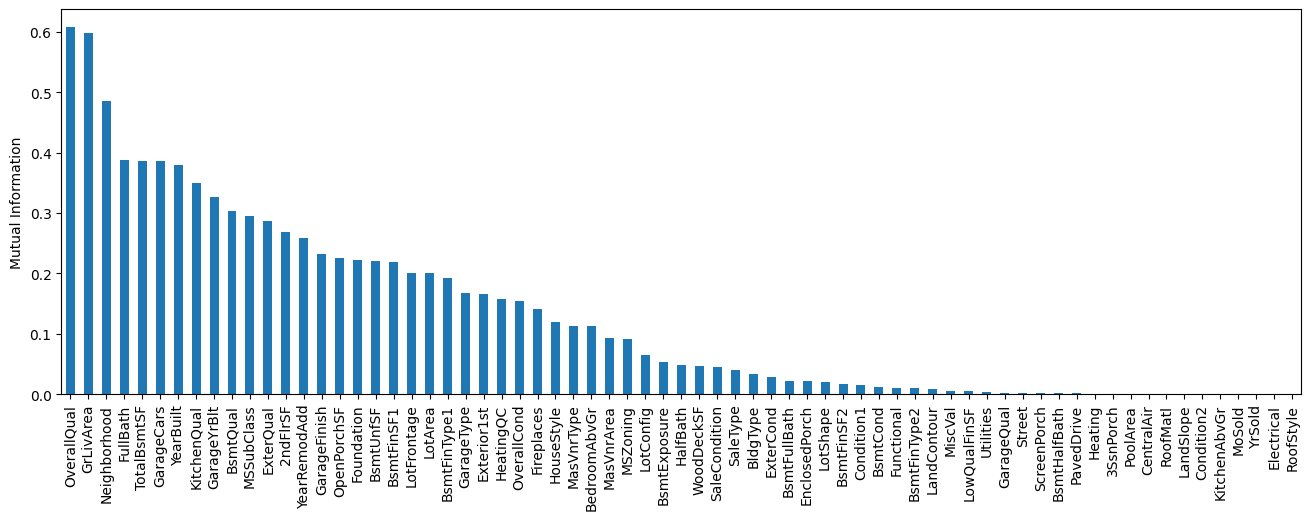

In [26]:
mi=mutual_info_regression(X_train,y_train)
mi=pd.Series(mi)
mi.index=X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(16,5))
plt.ylabel('Mutual Information')
plt.show()


Select top 10th percentile features

In [27]:
sel_=SelectPercentile(mutual_info_regression,percentile=33).fit(X_train,y_train)
X_train.columns[sel_.get_support()]


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

In [28]:
X_train=sel_.transform(X_train)
X_test=sel_.transform(X_test)


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
# y_pred_train=model.predict(X_train)

In [32]:
y_pred

array([163302.90265811, 108268.85250684, 240686.08361352, 197382.39012198,
        66247.02598024, 126407.50134514, 249519.91014769, 198707.97839184,
       241409.94640308, 147458.20891533, 167052.38281275, 147928.94323118,
        98703.55413713, 150122.91628365, 225364.37642317, 179904.19382505,
       191947.58113331, 192054.64573858, 177335.7343513 , 239036.51469976,
       249219.6067387 , 173555.91920141, 194927.5199257 , 234485.98440077,
       136495.13184716, 301619.82851617, 154964.00598467, 247883.69485822,
       117684.15924234, 268893.76243548, 147617.37240607, 185176.02892437,
       201498.0310615 ,  49103.95518835, 107363.68825867, 107378.33059529,
       151034.22870164, 138511.94066376, 175825.37455833,  84970.81863294,
       172914.47744241, 185031.05177118, 238442.01609463, 218367.16424265,
       101122.13898452, 279744.01121909, 183543.2389663 , 316472.09324815,
       183178.11284046, 216423.82608267, 155251.70789118, 222154.13104442,
       136742.39907543, 2

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [34]:
MAE=mean_absolute_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=sqrt(mean_squared_error(y_test,y_pred))
R2=r2_score(y_test,y_pred)

In [36]:
MAE,MSE,RMSE,R2

(14327.327020487355, 335637454.0110948, 18320.410858141113, 0.9156273961120799)

In [ ]:
from xgboost import XGBRegressor as xgbR
xgb = xgbR(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)
predictions = xgb.predict(X_test)   
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(predictions, y_test))))
print("R2 Score : " + str(r2_score(predictions, y_test)))

Mean Absolute Error : 13931.22401889535
Mean Squared Error : 404112335.76277435
Root Mean Squared Error : 20102.54550455674
R2 Score : 0.8868992907756836


In [ ]:
# from xgboost import XGBRegressor as xgbR
# xgb = xgbR(n_estimators=1000, learning_rate=0.01)
# xgb.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_train)], verbose=False)
# predictions = xgb.predict(X_test)   
# print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_train)))
# print("Mean Squared Error : " + str(mean_squared_error(predictions, y_train)))
# print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(predictions, y_train))))
# print("R2 Score : " + str(r2_score(predictions, y_train)))